# Milestone 2 - the daTaBABES

This notebook is the starting point of an analysis of the beer's popularity from two websites. We have explored and preprocessed the data.

**Popularity definition**: By popular we mean with respect to the number of **good** reviews

In [1]:
# imports

import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go

Users have rated the beers from two websites, RateBeer and BeerAdvocate, thus we get reviews of users from two distinct datasets. The reviews are in txt files, thus we convert the txt files into csv so that we can manipulate the data more easily. By doing this, we get as much as data as we can. 

The conversion of the txt files into csv files is done in the notebook 'preprocessing_txt.ipynb'.

Since our goal is to analyze the ratings, what is important here is to see if the ratings from the two websited differ. Can we merge the two datasets without falsing our final results? 

In [2]:
# loading the two datasets 

ratings_ba_df = pd.read_csv('data/BeerAdvocate/ratings_BA.csv')
ratings_rb_df = pd.read_csv('data/RateBeer/ratings_RB.csv')


# loading the users dataset 

users_ba_df = pd.read_csv('data/BeerAdvocate/users.csv')
users_rb_df = pd.read_csv('data/RateBeer/users.csv')

# loading the beers dataset

beers_ba_df = pd.read_csv('data/BeerAdvocate/beers.csv')
beers_rb_df = pd.read_csv('data/RateBeer/beers.csv')

In [3]:
# Convert the date column to datetime format for BeerAdvocate
ratings_ba_df['date'] = pd.to_datetime(ratings_ba_df['date'], unit='s')
ratings_ba_df['year'] = ratings_ba_df['date'].dt.year
ratings_ba_df['month'] = ratings_ba_df['date'].dt.month

# Convert the date column to datetime format for RateBeer
ratings_rb_df['date'] = pd.to_datetime(ratings_rb_df['date'], unit='s')
ratings_rb_df['year'] = ratings_rb_df['date'].dt.year
ratings_rb_df['month'] = ratings_rb_df['date'].dt.month

In [4]:
nbr_ratings_ba = ratings_ba_df.shape[0]
nbr_ratings_rb = ratings_rb_df.shape[0]

print('Number of ratings in BeerAdvocate: {}'.format(nbr_ratings_ba))
print('Number of ratings in RateBeer: {}'.format(nbr_ratings_rb))

Number of ratings in BeerAdvocate: 2715712
Number of ratings in RateBeer: 7122074


### Distribution of the average rating in BeerAdvocarte

In [5]:
ratings_ba_df[['appearance', 'aroma', 'palate', 'style', 'taste', 'overall', 'rating']].describe()

,appearance,aroma,palate,taste,overall,rating
count,2.672676e+06,2.672676e+06,2.672676e+06,2.672676e+06,2.672676e+06,2.715712e+06
mean,3.886281e+00,3.796439e+00,3.800010e+00,3.837103e+00,3.846609e+00,3.830343e+00
std,5.956038e-01,6.705662e-01,6.603258e-01,7.044489e-01,6.806139e-01,6.142972e-01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,3.500000e+00,3.500000e+00,3.500000e+00,3.500000e+00,3.500000e+00,3.530000e+00
50%,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,3.930000e+00
75%,4.250000e+00,4.250000e+00,4.250000e+00,4.500000e+00,4.250000e+00,4.230000e+00
max,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00


### Distribution of the average rating in RateBeer

In [6]:
ratings_rb_df[['appearance', 'aroma', 'palate', 'style', 'taste', 'overall', 'rating']].describe()

,appearance,aroma,palate,taste,overall,rating
count,7.122074e+06,7.122074e+06,7.122074e+06,7.122074e+06,7.122074e+06,7.122074e+06
mean,3.440407e+00,6.418375e+00,3.284702e+00,6.496641e+00,1.321530e+01,3.285543e+00
std,7.737700e-01,1.538632e+00,7.967887e-01,1.538095e+00,3.152041e+00,6.864740e-01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,5.000000e-01
25%,3.000000e+00,6.000000e+00,3.000000e+00,6.000000e+00,1.200000e+01,3.000000e+00
50%,3.000000e+00,7.000000e+00,3.000000e+00,7.000000e+00,1.400000e+01,3.400000e+00
75%,4.000000e+00,7.000000e+00,4.000000e+00,7.000000e+00,1.500000e+01,3.700000e+00
max,5.000000e+00,1.000000e+01,5.000000e+00,1.000000e+01,2.000000e+01,5.000000e+00


Number of beers in BeerAdvocate: 2715712
Number of beers in RateBeer: 7122074


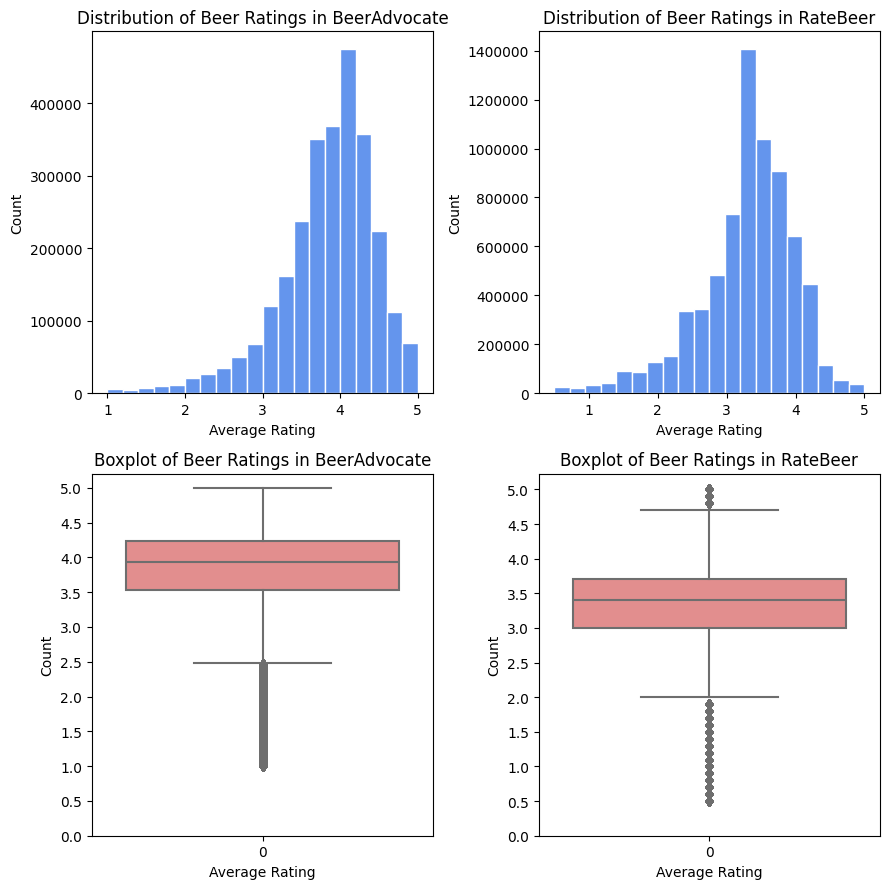

In [7]:
fig, axes = plt.subplots(2, 2, figsize=(9, 9))

# Number of beers in BeerAdvocate and RateBeer
print("Number of beers in BeerAdvocate:", len(ratings_ba_df))
print("Number of beers in RateBeer:", len(ratings_rb_df))

# BeerAdvocate - Histogram
axes[0, 0].hist(ratings_ba_df['rating'], bins=20, color='cornflowerblue', edgecolor='white')
axes[0, 0].set_xlabel('Average Rating')
axes[0, 0].set_ylabel('Count')
axes[0, 0].set_title('Distribution of Beer Ratings in BeerAdvocate')

# RateBeer - Histogram
axes[0, 1].hist(ratings_rb_df['rating'], bins=20, color='cornflowerblue', edgecolor='white')
axes[0, 1].set_xlabel('Average Rating')
axes[0, 1].set_ylabel('Count')
axes[0, 1].set_title('Distribution of Beer Ratings in RateBeer')
axes[0, 1].ticklabel_format(style="plain", axis="y")

# BeerAdvocate - Boxplot
sns.boxplot(ratings_ba_df['rating'], ax=axes[1, 0], color='lightcoral')
axes[1, 0].set_xlabel('Average Rating')
axes[1, 0].set_ylabel('Count')
axes[1, 0].set_title('Boxplot of Beer Ratings in BeerAdvocate')
axes[1, 0].set_yticks(np.arange(0, 5.5, 0.5))

# RateBeer - Boxplot
sns.boxplot(ratings_rb_df['rating'], ax=axes[1, 1], color='lightcoral')
axes[1, 1].set_xlabel('Average Rating')
axes[1, 1].set_ylabel('Count')
axes[1, 1].set_title('Boxplot of Beer Ratings in RateBeer')
axes[1, 1].set_yticks(np.arange(0, 5.5, 0.5))

plt.tight_layout()
plt.show()

As observed from the tables and the plot above, even though the distributions have a similar shape, i.e. normal distribution, they have a different average mean ratings. Indeed, users from the RateBeer dataset seem to be harsher in their ratings. 

Now, as defined above, our popularity definition concerns the number of **good** ratings. A question that arises is: what can be considered as a good rating? 

The ratings are continuous numbers between 0 to 5. One idea is to keep the ratings above the **average mean** of the two datasets and consider them as **good** rating. With this, we take in account the different distribution of the ratings into the two datasets and find a relatively good threshold. 

In [8]:
mean_ba = ratings_ba_df.rating.mean()
mean_rb = ratings_rb_df.rating.mean()

print("Mean rating in BeerAdvocate:", mean_ba)
print("Mean rating in RateBeer:", mean_rb)

Mean rating in BeerAdvocate: 3.8303429745127655
Mean rating in RateBeer: 3.285543157793643


Let's see what are the 10 most rated beer styles in each dataset.

Number of Beer Styles in AdvocateBeer: 104
Number of Beer Styles in RateBeer: 93


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/var/folders/59/4wtmm5814rs2dj58pby6qq240000gn/T/ipykernel_50032/3413916873.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plot1.text(ratings_ba_df['style'].value_counts()[i], i, f'Rank {ranking}', va='center')
/var/fold

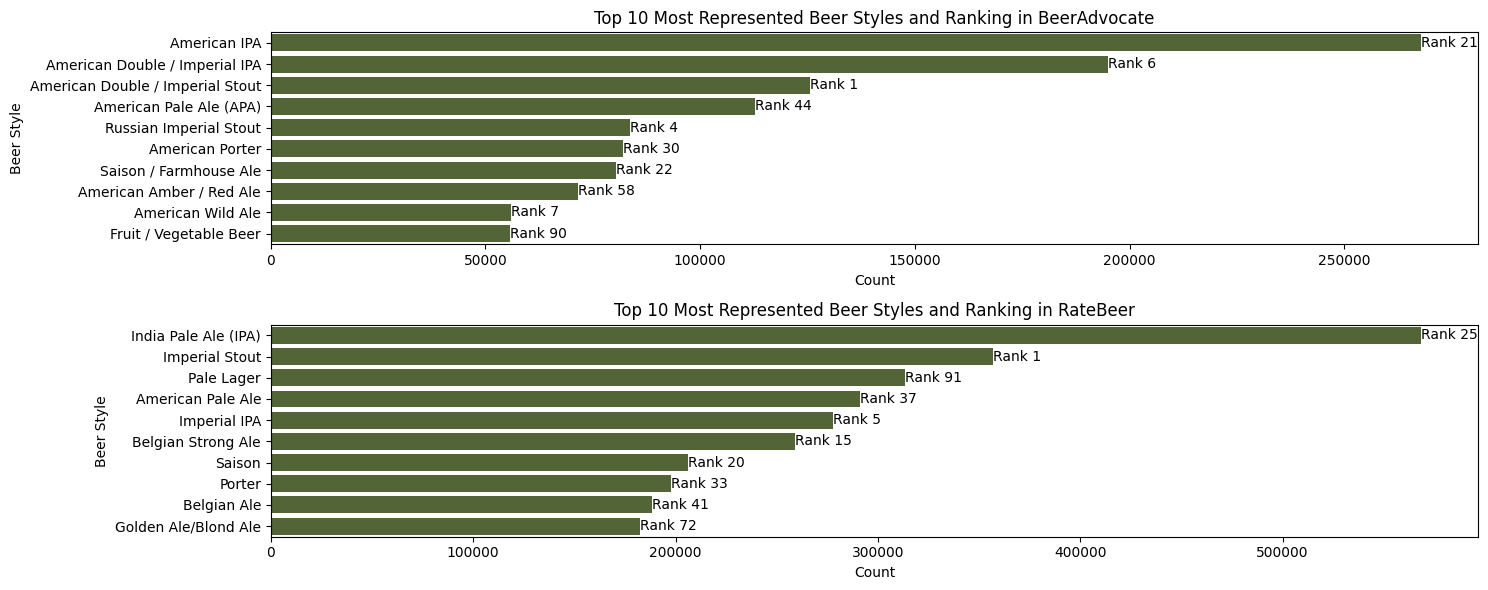

In [9]:
top_ratings_by_style_ba = ratings_ba_df.groupby('style')['rating'].mean().sort_values(ascending=False)
top_ratings_by_style_rb = ratings_rb_df.groupby('style')['rating'].mean().sort_values(ascending=False)

print(f"Number of Beer Styles in AdvocateBeer: {len(top_ratings_by_style_ba)}")
print(f"Number of Beer Styles in RateBeer: {len(top_ratings_by_style_rb)}")

# Number of top beer styles to plot
x = 10

# Create a figure with two subplots
fig, axes = plt.subplots(2, 1, figsize=(15, 6))

# BeerAdvocate
plot1 = sns.countplot(y='style', data=ratings_ba_df, order=ratings_ba_df['style'].value_counts().index[:x], color='darkolivegreen', ax=axes[0])
for i, style in enumerate(ratings_ba_df['style'].value_counts().index[:x]):
    ranking = top_ratings_by_style_ba.index.get_loc(style) + 1  
    plot1.text(ratings_ba_df['style'].value_counts()[i], i, f'Rank {ranking}', va='center')
axes[0].set_xlabel('Count')
axes[0].set_ylabel('Beer Style')
axes[0].set_title(f'Top {x} Most Represented Beer Styles and Ranking in BeerAdvocate')

# RateBeer
plot2 = sns.countplot(y='style', data=ratings_rb_df, order=ratings_rb_df['style'].value_counts().index[:x], color='darkolivegreen', ax=axes[1])
for i, style in enumerate(ratings_rb_df['style'].value_counts().index[:x]):
    ranking = top_ratings_by_style_rb.index.get_loc(style) + 1  
    plot2.text(ratings_rb_df['style'].value_counts()[i], i, f'Rank {ranking}', va='center')
axes[1].set_xlabel('Count')
axes[1].set_ylabel('Beer Style')
axes[1].set_title(f'Top {x} Most Represented Beer Styles and Ranking in RateBeer')

plt.tight_layout()
plt.show()


From the two plots above we can observe that a beer style can be popular but not have the best rating. For example in the plot of the RateBeer dataset, we see that the  3rd most popular beer style with respect to “count” is the 91th most popular beer style (over 93) when it comes to mean average rating. This finding conforts us in our definition of popularity.

Filtered dataframes to only keep the rating bigger than mean average rating:

In [10]:
ratings_ba_df_untouched = ratings_ba_df.copy()
ratings_rb_df_untouched = ratings_rb_df.copy()

# Filter the ratings dataframes to only keep the popular ratings
ratings_ba_df = ratings_ba_df[ratings_ba_df['rating'] > mean_ba]
ratings_rb_df = ratings_rb_df[ratings_rb_df['rating'] > mean_rb]

### Users' location

As a second step, let's see the number of unique users per country. Indeed, this observation is interesting for our analysis, since we focus on the US consumers. I.e., let's consider a beer which has a large number of good ratings. But, if by digging more deeply we observe that only 10 users have rated it, it is not representative to the US consumers, and thus cannot be considered as popular among the users. 

In [11]:
# extract the country from the location

users_rb_df['location'] = users_rb_df['location'].str.split(',').str[0]
users_ba_df['location'] = users_ba_df['location'].str.split(',').str[0]

In [12]:
# number of users per country, in RateBeer
rb_user_count_country = users_rb_df.groupby('location')['location'].count().sort_values(ascending=False).reset_index(name='nb users in RateBeer')

# number of users per country, in BeerAdvocate
ba_user_count_country = users_ba_df.groupby('location')['location'].count().sort_values(ascending=False).reset_index(name='nb users in BeerAdvocate')

In [13]:
# merge the two above data frames to count the total number of users per country
users_country = rb_user_count_country.merge(ba_user_count_country, on='location')
users_country['total nb of users'] = users_country['nb users in RateBeer'] + users_country['nb users in BeerAdvocate']
users_country = users_country.sort_values('total nb of users', ascending=False)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'United States'),
  Text(1, 0, 'Canada'),
  Text(2, 0, 'England'),
  Text(3, 0, 'Australia'),
  Text(4, 0, 'Poland'),
  Text(5, 0, 'Netherlands'),
  Text(6, 0, 'Sweden'),
  Text(7, 0, 'Germany'),
  Text(8, 0, 'Belgium'),
  Text(9, 0, 'Denmark')])

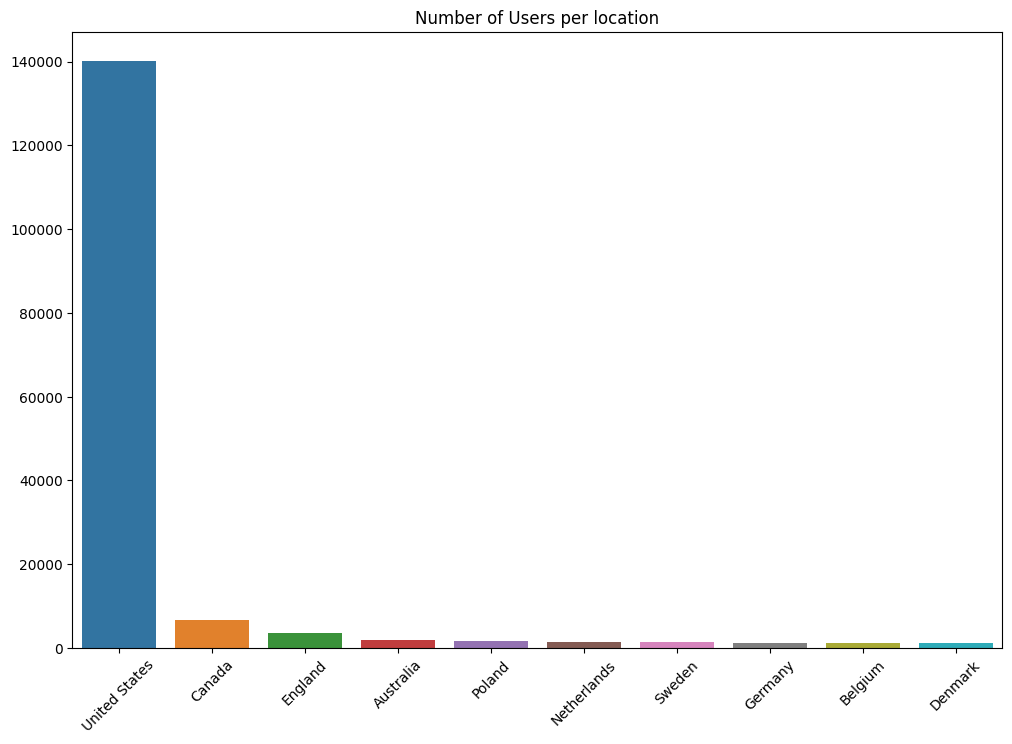

In [14]:
# plotting the distribution
plt.figure(figsize=(12,8))
sns.barplot(x=users_country['location'].values[:10], y=users_country['total nb of users'].values[:10])
plt.title('Number of Users per location')
plt.xticks(rotation=45)

As we see, the US has much more users than the other countries. This leads us to think that by focusing on this country, we will get the most diverse reviews as they come from many different users. If we would consider Canada for example, we could have bias results as there are not so many users and the reviews come from a small set of people, leading us to provide a perfect beer for very few people. For this reason, our analysis will be focused on the US only.

Let's filter to get only US users.

In [15]:
US_country = 'United States'

# keep only the rows where the user country is United States
users_ba_df = users_ba_df[users_ba_df.location == US_country]
users_rb_df = users_rb_df[users_rb_df.location == US_country]

In [16]:
# merge the ratings and users data frames to get the location of the user for each rating
ratings_users_ba_df = pd.merge(ratings_ba_df, users_ba_df[['user_id', 'location']], on='user_id', how='inner')
ratings_users_rb_df = pd.merge(ratings_rb_df, users_rb_df[['user_id', 'location']], on='user_id', how='inner')

# filter the ratings dataframes to only keep the popular ratings of the users from the US
ratings_ba_df = ratings_users_ba_df[ratings_users_ba_df.location == US_country]
ratings_ba_df.drop('location', axis=1, inplace=True)
ratings_rb_df = ratings_users_rb_df[ratings_users_rb_df.location == US_country]
ratings_rb_df.drop('location', axis=1, inplace=True)

## Temporal Analysis

In [17]:
# merge the two ratings data frames
ratings_combined_df = pd.concat([ratings_ba_df, ratings_rb_df], ignore_index=True)

### General analysis 

In [31]:
# create a year_month column
ratings_combined_df['year_month'] = ratings_combined_df['year'].astype(str) + '-' + ratings_combined_df['month'].astype(str)

# convert the year_month column to datetime format
ratings_combined_df['year_month'] = pd.to_datetime(ratings_combined_df['year_month'])

# group by year_month and count the number of ratings per year_month
year_month_ratings_count = ratings_combined_df.groupby('year_month')['year_month'].count()

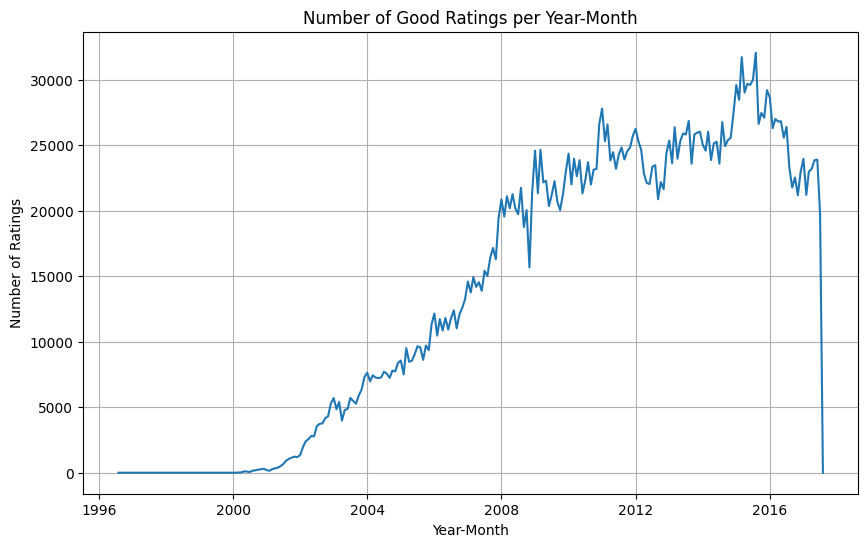

In [36]:
# Yearly plot of the number of ratings
plt.figure(figsize=(10, 6))
plt.plot(year_month_ratings_count)
plt.title('Number of Good Ratings per Year-Month')
plt.xlabel('Year-Month')
plt.grid()
plt.ylabel('Number of Ratings')
plt.show()

In [37]:
print('Earliest date of ratings:', ratings_combined_df['date'].min())
print('Latest date of ratings:', ratings_combined_df['date'].max())

Earliest date of ratings: 1996-08-22 10:00:00
Latest date of ratings: 2017-08-01 10:00:00


By observing the plot, the number of ratings increases linearly from 1996 to 2008. After 2008, it still increases but less. Also, we observe a lot of variations, especially between 2008 and 2016, which could indicate a seasonality of the beers. 

Let's observe the average ratings per month from 2008 to 2016. 

In [38]:
# creating a new dataframe with the number of ratings per year_month
year_month_ratings_count_df = pd.DataFrame({'year_month': year_month_ratings_count.index, 'nbr_ratings': year_month_ratings_count.values})

# create column year and month
year_month_ratings_count_df['year'] = year_month_ratings_count_df['year_month'].dt.year
year_month_ratings_count_df['month'] = year_month_ratings_count_df['year_month'].dt.month

# keep only rows where the year is greater than 2011 and less than 2017 
year_month_ratings_count_filtered = year_month_ratings_count_df[(year_month_ratings_count_df.year >= 2008) & (year_month_ratings_count_df.year < 2017)]

# compute the mean number of ratings per month
mean_ratings_per_month = year_month_ratings_count_filtered.groupby('month')['nbr_ratings'].mean().reset_index(name='mean_nbr_ratings')

# plot with plotly the mean number of ratings per month
fig = px.line(year_month_ratings_count_filtered, x='month', y='nbr_ratings', color='year', title='Mean Number of Ratings per Month (from 2008 to 2016)')
fig.add_trace(go.Scatter(x=year_month_ratings_count_filtered.month, y=mean_ratings_per_month.mean_nbr_ratings, mode='lines', name='Mean Number of Ratings', line=dict(color='black', dash='dash', width=4)))

fig.show()

![alt text](plots/monthlyTotal1.png "title")

From the plot above, we observe some seasonality of the beer's ratings. Indeed, we can remark that some months have some peak of ratings. The months December/January have the biggest increase. We can also see that the months of March, August and also slightly less May and October, have increases of the number of ratings. 

In [39]:
# creating a new dataframe with the number of ratings per year_month
year_month_ratings_count_df = pd.DataFrame({'year_month': year_month_ratings_count.index, 'nbr_ratings': year_month_ratings_count.values})

# create column year and month
year_month_ratings_count_df['year'] = year_month_ratings_count_df['year_month'].dt.year
year_month_ratings_count_df['month'] = year_month_ratings_count_df['year_month'].dt.month

# keep only rows where the year is greater than 2011 and less than 2017 
year_month_ratings_count_filtered = year_month_ratings_count_df[(year_month_ratings_count_df.year > 2011) & (year_month_ratings_count_df.year < 2017)]

# compute the mean number of ratings per month
mean_ratings_per_month = year_month_ratings_count_filtered.groupby('month')['nbr_ratings'].mean().reset_index(name='mean_nbr_ratings')

# plot with plotly the mean number of ratings per month
fig = px.line(year_month_ratings_count_filtered, x='month', y='nbr_ratings', color='year', title='Mean Number of Ratings per Month (from 2012 to 2016)')
fig.add_trace(go.Scatter(x=year_month_ratings_count_filtered.month, y=mean_ratings_per_month.mean_nbr_ratings, mode='lines', name='Mean Number of Ratings', line=dict(color='black', dash='dash', width=4)))

fig.show()

![alt text](plots/monthlyTotal2.png "title")

By narrowing the filtering of the years, we observe with the Mean Number of Ratings curve, that the peaks are more intense, especially for August and October. 

### Top beer styles per months

In [18]:
# print all the unique beer styles
unique_styles = sorted(ratings_combined_df['style'].unique())
print(f'Number of unique beer styles: {len(unique_styles)} \n')
for style in unique_styles:
    print(style)

Number of unique beer styles: 178 

Abbey Dubbel
Abbey Tripel
Abt/Quadrupel
Altbier
Amber Ale
Amber Lager/Vienna
American Adjunct Lager
American Amber / Red Ale
American Amber / Red Lager
American Barleywine
American Black Ale
American Blonde Ale
American Brown Ale
American Dark Wheat Ale
American Double / Imperial IPA
American Double / Imperial Pilsner
American Double / Imperial Stout
American IPA
American Malt Liquor
American Pale Ale
American Pale Ale (APA)
American Pale Lager
American Pale Wheat Ale
American Porter
American Stout
American Strong Ale
American Wild Ale
Baltic Porter
Barley Wine
Belgian Ale
Belgian Dark Ale
Belgian IPA
Belgian Pale Ale
Belgian Strong Ale
Belgian Strong Dark Ale
Belgian Strong Pale Ale
Berliner Weissbier
Berliner Weisse
Bitter
Bière de Champagne / Bière Brut
Bière de Garde
Black & Tan
Black IPA
Bock
Braggot
Brown Ale
California Common
California Common / Steam Beer
Chile Beer
Cider
Cream Ale
Czech Pilsener
Czech Pilsner (Světlý)
Doppelbock
Dortmunder /

In [19]:
# ensure that same beer styles are named the same
ratings_combined_df['style'].replace('Czech Pilsener', 'Czech Pilsner (Světlý)', inplace=True)
ratings_combined_df['style'].replace('Dortmunder / Export Lager', 'Dortmunder/Helles', inplace=True)
ratings_combined_df['style'].replace('Foreign / Export Stout', 'Foreign Stout', inplace=True)
ratings_combined_df['style'].replace('Fruit / Vegetable Beer', 'Fruit Beer', inplace=True)
ratings_combined_df['style'].replace('California Common', 'California Common / Steam Beer', inplace=True)
ratings_combined_df['style'].replace('Märzen / Oktoberfest', 'Oktoberfest/Märzen', inplace=True)
ratings_combined_df['style'].replace('Saison', 'Saison / Farmhouse Ale', inplace=True)
ratings_combined_df['style'].replace('American Pale Ale', 'American Pale Ale (APA)', inplace=True)
ratings_combined_df['style'].replace('Weizen Bock', 'Weizenbock', inplace=True)

Most rated beer styles for each month while only considering **good** ratings.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/var/folders/59/4wtmm5814rs2dj58pby6qq240000gn/T/ipykernel_50032/2420692924.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(month_data['style'].value_counts()[i], i, f'Rank {ranking}', va='center', ha='left', colo

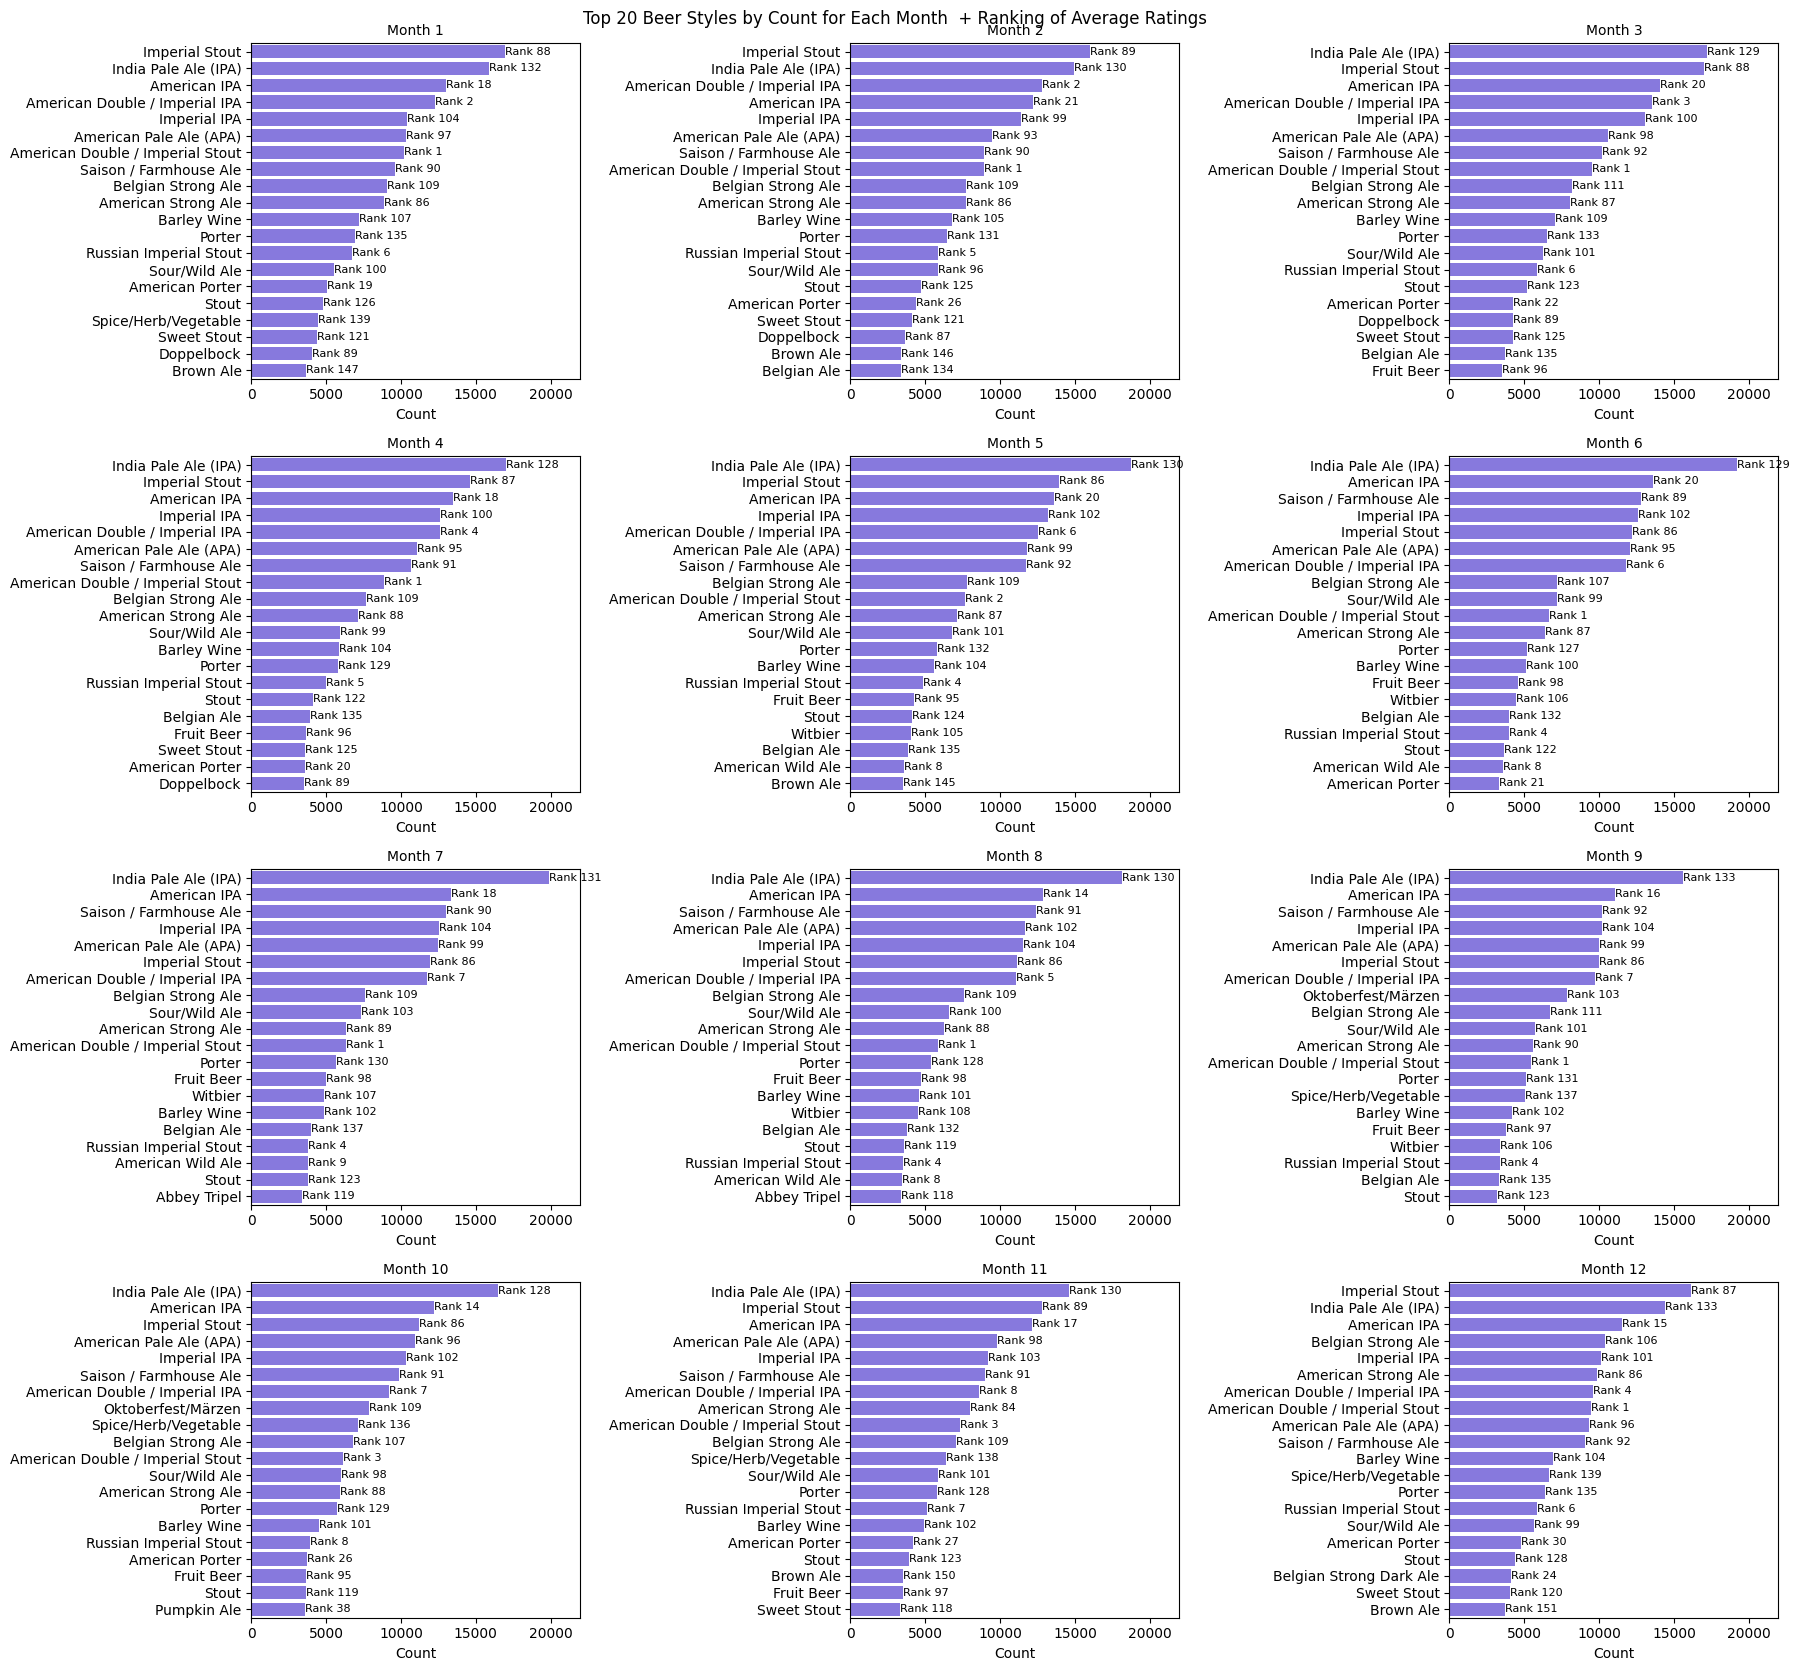

Number of styles that appear in the top 20 for at least one month: 28
Style Occurrences:
Abbey Tripel: 2 times
American Double / Imperial IPA: 12 times
American Double / Imperial Stout: 12 times
American IPA: 12 times
American Pale Ale (APA): 12 times
American Porter: 8 times
American Strong Ale: 12 times
American Wild Ale: 4 times
Barley Wine: 12 times
Belgian Ale: 8 times
Belgian Strong Ale: 12 times
Belgian Strong Dark Ale: 1 times
Brown Ale: 5 times
Doppelbock: 4 times
Fruit Beer: 9 times
Imperial IPA: 12 times
Imperial Stout: 12 times
India Pale Ale (IPA): 12 times
Oktoberfest/Märzen: 2 times
Porter: 12 times
Pumpkin Ale: 1 times
Russian Imperial Stout: 12 times
Saison / Farmhouse Ale: 12 times
Sour/Wild Ale: 12 times
Spice/Herb/Vegetable: 5 times
Stout: 12 times
Sweet Stout: 6 times
Witbier: 5 times


In [20]:
# Number of top beer styles to plot
x = 20

fig, axes = plt.subplots(4, 3, figsize=(18, 17))
fig.suptitle(f'Top {x} Beer Styles by Count for Each Month  + Ranking of Average Ratings')

max_count_across_months = ratings_combined_df.groupby('month')['style'].value_counts().head(x).max()
style_occurrences = {style: 0 for style in unique_styles}

for month, ax in zip(range(1, 13), axes.flatten()):
    month_data = ratings_combined_df[ratings_combined_df['month'] == month]
    top_styles_by_count = month_data['style'].value_counts().head(x).index
    avg_ratings_by_style = month_data.groupby('style')['rating'].mean().sort_values(ascending=False)

    # Count the number of times each style appears in the top 20 for each month
    for style in top_styles_by_count:
        style_occurrences[style] += 1

    sns.countplot(y='style', data=month_data, order=top_styles_by_count, ax=ax, color='mediumslateblue')
    ax.set_title(f'Month {month}', fontsize=10)
    ax.set_xlabel('Count')
    ax.set_ylabel('')
    ax.set_xlim(0, max_count_across_months + 5000)
    for i, style in enumerate(top_styles_by_count):
        ranking = avg_ratings_by_style.index.get_loc(style) + 1
        ax.text(month_data['style'].value_counts()[i], i, f'Rank {ranking}', va='center', ha='left', color='black', fontsize=8)

plt.tight_layout()
plt.show()

# Print the style occurrences dictionary and remove styles that never appear in the top 20
style_occurrences = {style: count for style, count in style_occurrences.items() if count > 0}
print("Number of styles that appear in the top 20 for at least one month:", len(style_occurrences))
print("Style Occurrences:")
for style, count in style_occurrences.items():
    print(f"{style}: {count} times")


Let's now observe the average ratings per month of some Beer's style. Can we see any particular differences? Have those styles any period where the number of ratings increases?

In [41]:
sample_styles = ['Oktoberfest/Märzen', 'American Pale Ale (APA)', 'Belgian Strong Dark Ale']

for style in sample_styles: 
    ratings_users_sample = ratings_combined_df[ratings_combined_df['style'] == style]

    # group by year_month and count the number of ratings per year_month
    year_month_ratings_count_sample = ratings_users_sample.groupby('year_month')['year_month'].count()

    year_month_ratings_count_sample = pd.DataFrame({'year_month': year_month_ratings_count_sample.index, 'nbr_ratings': year_month_ratings_count_sample.values})

    year_month_ratings_count_sample['year'] = year_month_ratings_count_sample['year_month'].dt.year
    year_month_ratings_count_sample['month'] = year_month_ratings_count_sample['year_month'].dt.month

    # keep only rows where the year is greater than 2011 and less than 2017 
    year_month_ratings_count_filtered = year_month_ratings_count_sample[(year_month_ratings_count_sample.year >= 2008) & (year_month_ratings_count_sample.year < 2017)]

    # compute the mean number of ratings per month
    mean_ratings_per_month = year_month_ratings_count_filtered.groupby('month')['nbr_ratings'].mean().reset_index(name='mean_nbr_ratings')

    # plot with plotly the mean number of ratings per month
    fig = px.line(year_month_ratings_count_filtered, x='month', y='nbr_ratings', color='year', title='Mean Number of Ratings per Month for {}'.format(style))
    fig.add_trace(go.Scatter(x=year_month_ratings_count_filtered.month, y=mean_ratings_per_month.mean_nbr_ratings, mode='lines', name='Mean Number of Ratings', line=dict(color='black', dash='dash', width=4)))

    fig.show()

![alt text](plots/monthlyOktober.png "title")

![alt text](plots/monthlyAPA.png "title")

![alt text](plots/monthlyBelgian.png "title")

From the three plots, we observe big differences of the average ratings over a year. The 'Oktoberfest/Märzen' style of beers has a big increases of the ratings during the Oktoberfest period, in October. During the rest of the year, the number of ratings is low and does not fluctuates at all. 

One of the most rated style is the APA, and as observed in the plot, the number of ratings does not have huge increases at some period. The style is quite popular throughout the year. 

Finally, the style 'Belgian Dark Ale' has a huge increase of the number of good ratings at the end of the year, during the festivities of the end of the year. 

## Dictionary Analysis

In order to analyze the reviews of users, we create dictionaries that contain key words that are commonly used to describe some aspects of a beer. From these dictionaries, we look for the keywords in the reviews and we will then analyze more in depth wether it is used with in a positive or negative way. At the end of this part, we should be able to get the best aroma, taste, palate, and other perfect beer caracteristics for each month.


First, let's define our dictionaries and look wether they are relevant or not by looking at the distribution of key words in the reviews.

In [21]:
# key words taken from https://appellationbeer.com/blog/words-to-describe-the-beer-you-are-tasting/

aroma = ('Malty, biscuity, breadlike, grainy, rich, deep, roasty, cereal, cookie-like, coffeeish, caramelly, toffee-like, molasses-like, malt complexity, smoky, sweet, autumnal, burnt cream, scalded milk, oatmeal, rustic, layered'.split(',')) + ('Piney, citrusy, grapefruity, earthy, musty, spicy, sharp, bright, fresh, herbal, zippy, lemony, newly-mown lawn, aromatic, floral, springlike, brilliant, sprucelike, juniper-like, minty, pungent, elegant, grassy'.split(','))
color = 'pale straw, staw, pale gold, deep gold, pale amber, medium amber, deep amber, amber brown, brown, ruby brown, deep brown, black'.split(',')
flavors = 'Sweet, Malty, biscuity, breadlike, grainy, rich, deep, roasty, cereal, cookie-like, coffeeish, caramelly, toffee-like, molasses-like, malt complexity, smoky, autumnal, burnt cream, scalded milk, oatmeal, rustic, layered'.split(',')
flavor_bitterness = 'Piney, citrusy, grapefruity, earthy, musty, spicy, sharp, bright, fresh, herbal, zippy, lemony, newly-mown lawn, aromatic, floral, springlike, brilliant, sprucelike, juniper-like, minty, pungent, elegant, grassy'.split(',')
fermentation_taste = 'Fresh-baked bread, clovelike, bubblegum, yeasty, Belgiany, aromatic, tropical, subtle, fruity, clean, banana-like, horseblankety, earthy, musty'.split(',')
conditioning = 'Soft, effervescent, spritzy, sparkling, zippy, pinpoint, bubbly, gentle, low carbonation, highly carbonated'.split(',')
body_mouthfeel = 'Rich, full, light, slick, creamy, oily, heavy, velvety, dry, thick, thin'.split(',')
alcohol_flavors = 'Warm finish, heat, vodka, esters, pungent, strength'.split(',')

In [22]:
# creating dict from lists

flavors_dict = {x:0 for x in flavors}
flavor_bitterness_dict = {x:0 for x in flavor_bitterness}
fermentation_taste_dict = {x:0 for x in fermentation_taste}
conditioning_dict = {x:0 for x in conditioning}
body_mouthfeel_dict = {x:0 for x in body_mouthfeel}
alcohol_flavors_dict = {x:0 for x in alcohol_flavors}
aroma_dict = {x:0 for x in aroma}
color_dict = {x:0 for x in color}

In [23]:
# lists of dictionaries and categories, used after to count the occurences.

key_words_lists = [flavors, flavor_bitterness, fermentation_taste, conditioning, body_mouthfeel, alcohol_flavors, aroma, color]
key_words_dict = [flavors_dict, flavor_bitterness_dict, fermentation_taste_dict, conditioning_dict, body_mouthfeel_dict, alcohol_flavors_dict, aroma_dict, color_dict]
categories = 'Flavors, Flavor bitterness, fermentation taste, conditioning, body mouthfeel, alcohol flavors, Aroma, Color'.split(',')

Now, let's retrieve reviews from US users.

In [24]:
us_texts_ba = ratings_ba_df.merge(users_ba_df, on='user_id', how='inner')
us_texts_rb = ratings_rb_df.merge(users_rb_df, on='user_id', how='inner')

In [25]:
# dropping missing text
us_texts_ba = us_texts_ba.dropna(subset=['text'])
us_texts_rb = us_texts_rb.dropna(subset=['text'])

In [26]:
texts = list(us_texts_ba['text'].values) + list(us_texts_rb['text'].values)

In [27]:
for i, ls in enumerate(key_words_lists):
    current_dict = key_words_dict[i]
    
    for w in ls:
        for text in texts:
            if w.lower() in text:
                current_dict[w] += 1

To make the plot clearer, we divide by the total number of reviews. Therefore, in the plot we read the percentage of reviews in which a key word is present.

In [28]:
total_reviews = len(texts)

In [29]:
# plotting the occurences per catefory
for i,d in enumerate(key_words_dict):
    category = categories[i]
    plt.figure(figsize=(20,8))
    sns.barplot(x=d.keys(), y= (np.asarray(list(d.values())) / total_reviews))
    plt.title('Number of occurences of key words for category ' + category)
    plt.xticks(rotation=45)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


AttributeError: 'bool' object has no attribute 'all'

<Figure size 2000x800 with 0 Axes>

As we see, in aroma, "sweet" is much more present than the other key words and in color "brown" dominates. Let's remove them to have a better idea of the plot for the other key words.